# Objective: 

borrowers who default cause the largest amount of loss to the lenders. 
In this case, the customers labelled as 'charged-off' are the 'defaulters'

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
Identification of such applicants using EDA is the aim of this case study.

# Results Expected
- Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
- Present the overall approach of the analysis in a presentation: 
- Mention the problem statement and the analysis approach briefly 
- Explain the results of univariate, bivariate analysis etc. in business terms
- Include visualisations and summarise the most important results in the presentation
 

You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. 

 

`Important Note: Please make sure to rename your Python notebook "Group_Facilitator_Name.ipynb". `

 

 You need to submit a GitHub repository link that contains the files above . You need to write a README.md for the GitHub repository.  You can follow the video below to understand how to create the GitHub repository. Make sure your GitHub link is public. 

In [269]:
## Importing all the required Libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
## Formatting the view of jupyter notebook

# Setting the maximum rows to 20
pd.set_option('display.max_rows', 200)

# Setting the maximum columns as per the data dictionary, able to view all the avaialable columns for analysis
pd.set_option('display.max_columns', 120)

pd.set_option('display.width', 1000)

# 1. Data Sourcing

In [271]:
## Loading the loan.csv dataset
## Reading the csv data set and store it into a dataframe

loan_df = pd.read_csv('./loan/loan.csv') # The path of the dataset is 
loan_df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24752\2337859594.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('./loan/loan.csv') # The path of the dataset is


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Viewing the basic statistics of the dataset

In [272]:
# Check the number of rows and columns 
print(loan_df.shape)

## Result : the data set consists of 39717 rows and 111 columns

(39717, 111)


In [273]:
# check the column type and null count in each column using info()
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [274]:
## To view the full list of column, using the option verbose=True in info() method

print(loan_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [275]:
## Getting the column types

loan_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [276]:
## Observing the statisics using describe
loan_df.describe()

## Result : as all the columns are object data type not much information obtained from describe

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# 2. Data Cleaning

### In this section will be cleaning the data set by applying the following approaches
- 2.1 Fixing Missing Values
- 2.2 Fix Rows and columns
- 2.3 Standardise Values
- 2.4 Fix invalid values
- 2.5 Filter data

## 2.1 : Fixing Missing Values

In [277]:
## Getting the count of null values in each column
loan_df.isnull().sum().sort_values(ascending=False)

## Observations: There are columns which all all null values. We can drop these columns
## As these columnms will not contribute anything in our analysis

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


## Dropping the list of fields having all field values as null

In [278]:
## Getting the list of columns having all null values

## Getting list of columns having all column values as null
# list_of_null_columns = [col for col in loan_df.columns if loan_df[col].isnull().sum() == (loan_df.shape)[0]]



## Dropping above list of colums having all column values as null
print(f'shape of dataframe before dropping columns {loan_df.shape}')
# loan_df = loan_df.drop(list_of_null_columns, axis=1)
loan_df=loan_df.dropna(axis=1, how='all')
print(f'shape of dataframe after dropping columns {loan_df.shape}')


## Observation: Nearly 50 columns have been dropped as all these column contain all null values


shape of dataframe before dropping columns (39717, 111)
shape of dataframe after dropping columns (39717, 57)


## Analyzing columns having large number of null values

In [279]:
## Getting the count of null values in each column for the modified dataframe
loan_df.isnull().sum().sort_values(ascending=False)

## Observations : Few more columns are present which contain a large null values
## Let observe deeply what values these field contain

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

## Lets analyze all the fields having null values

In [280]:
loan_df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [281]:
# Analysing the different values prresent in field next_pymnt_d
loan_df['next_pymnt_d'].value_counts()

# next_pymnt_d           -> this field can be dropped as it will not contribute towards the analysis
# mths_since_last_record -> this field denotes last month till the record was avaialble. This too can be droped
# Similiarly mths_since_last_delinq and desc can be droped

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

## Dropping list of clumns as it contains a large Amount of null values
- next_pymnt_d
- mths_since_last_record
- mths_since_last_delinq
- desc

In [282]:
## Dropping columns next_pymnt_d, mths_since_last_record, mths_since_last_delinq, desc

column_list = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc']
print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df = loan_df.drop(column_list, axis=1)
print(f'shape of dataframe after dropping columns {loan_df.shape}')



shape of dataframe before dropping columns (39717, 57)
shape of dataframe after dropping columns (39717, 53)


In [283]:
## Checking the null values
loan_df.isnull().sum().sort_values(ascending=False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

In [284]:
## Analyzing field emp_title
loan_df['emp_title'].value_counts()

## Observations:
## emp_title contains a large amount of null values and also this field will not contribute to the analysis
## Dropping this column

## emp_title field is the job title of the borrower can be droped
print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df = loan_df.drop(['emp_title'], axis=1)
print(f'shape of dataframe after dropping columns {loan_df.shape}')




shape of dataframe before dropping columns (39717, 53)
shape of dataframe after dropping columns (39717, 52)


## Setting 'Not Available' for the null values in pub_rec_bankruptcies

In [285]:
## Analyzing pub_rec_bankruptcies

print(loan_df['pub_rec_bankruptcies'].isnull().sum())
print(loan_df['pub_rec_bankruptcies'].value_counts(normalize=True))

## Observations:
## Around 95 % of data belongs to the group 0.0
## 697 are null values, Assigning them to any of the groups might impact the stats, like % of null > % of category 2.0
## Lets assign the null values as 'Not Available'

loan_df['pub_rec_bankruptcies'].fillna('Not Available', inplace=True)
print('POST filna ---------')
print(loan_df['pub_rec_bankruptcies'].value_counts())

print(loan_df['pub_rec_bankruptcies'].isnull().sum())

697
0.0    0.956920
1.0    0.042901
2.0    0.000179
Name: pub_rec_bankruptcies, dtype: float64
POST filna ---------
0.0              37339
1.0               1674
Not Available      697
2.0                  7
Name: pub_rec_bankruptcies, dtype: int64
0


## Setting 'Not Available' for the null values in emp_length

In [314]:
## Analyzing emp_length 
print(loan_df['emp_length'].value_counts(normalize=True))

print(f"% of null values - {loan_df['emp_length'].isnull().sum()/len(loan_df)}")

## Observations: This field represent the number of years of employment. This can be a key field on analysis.
## Number number of years of employment will be more likely to repay the loan


loan_df['emp_length'].fillna('Not Available', inplace=True)
print('POST filna ---------')
print(loan_df['emp_length'].value_counts())

print(loan_df['emp_length'].isnull().sum())

10+ years    0.229776
< 1 year     0.118602
2 years      0.113555
3 years      0.105973
4 years      0.088919
5 years      0.084933
1 year       0.083847
6 years      0.057683
7 years      0.045883
8 years      0.038274
9 years      0.032555
Name: emp_length, dtype: float64
% of null values - 0.027066495455346576
POST filna ---------
10+ years        8879
< 1 year         4583
2 years          4388
3 years          4095
4 years          3436
5 years          3282
1 year           3240
6 years          2229
7 years          1773
8 years          1479
9 years          1258
Not Available    1075
Name: emp_length, dtype: int64
0


## 2.2 Fix Rows and columns

## Fixing Rows

### 2.2.a Delete incorrect Rows : Unnecessary header and Footer rows

In [288]:
## Fetching the head and tail of the records to view any unnecessary data is present

loan_df.head()
loan_df.tail()

## Observations: Header & Footer rows are fine. Nothing to remove

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,Not Available,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,Not Available,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,Not Available,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,Not Available,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,7,0,4175,51.50%,8,f,0.0,0.0,9195.263334,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,Not Available,NaN


### 2.2.b Delete summary rows if any

In [289]:

## Observations: No such summary rows to be deleted. Few of the rows marked as total* will be used for analysis

### 2.2.c Delete Extra rows: Detecting column number indicator, blank rows etc

In [290]:

## Dropping rows which have all null values
print(f'shape of dataframe before dropping rows {loan_df.shape}')
loan_df.dropna(axis='index', how='all', inplace=True)
print(f'shape of dataframe after dropping rows {loan_df.shape}')

## Observation: There are no rows having all null values
## There are no column indicator

shape of dataframe before dropping rows (39717, 52)
shape of dataframe after dropping rows (39717, 52)


## Fixing Columns

### 2.2.d : Add column name if missing

In [291]:

## Observations: 
## All column have column header names

### 2.2.e : Rename Columns for Abbrevations and encoded columns

In [292]:

## Observations : As of now the header names looks good and do not contain any abbreviated oe encoded columns


### 2.2.f : Delete unnecessary columns 

In [293]:
## Analyzying zip_code values

loan_df['zip_code'].value_counts(normalize=True)

## Observations:
## zip_code fields have a huge segment of data and may not contribute in this analysis, we can drop them



100xx    0.015031
945xx    0.013722
112xx    0.012992
606xx    0.012665
070xx    0.011909
           ...   
381xx    0.000025
378xx    0.000025
739xx    0.000025
396xx    0.000025
469xx    0.000025
Name: zip_code, Length: 823, dtype: float64

In [294]:
## Analyzying policy_code values
loan_df['policy_code'].value_counts()

## Observations:
## It contains only a single value, we can drop it

1    39717
Name: policy_code, dtype: int64

In [295]:
## Analyzying 'chargeoff_within_12_mths' values

print(loan_df['chargeoff_within_12_mths'].value_counts())
print(loan_df['chargeoff_within_12_mths'].isnull().sum())

## Observations:
## This field contains all the values as 0.0 and the rest values are null
## We can drop this column

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
56


In [296]:
## Analyzying 'delinq_amnt' values

print(loan_df['delinq_amnt'].value_counts())

## Observation:
## Only value 0 is present in this column, we can drop it

0    39717
Name: delinq_amnt, dtype: int64


In [297]:
## Analyzying 'pub_rec_bankruptcies' values

loan_df['pub_rec_bankruptcies'].value_counts()

## Observations:
## This field cannot be removed as it contains different segment of data

0.0              37339
1.0               1674
Not Available      697
2.0                  7
Name: pub_rec_bankruptcies, dtype: int64

In [298]:
## Analyzying 'tax_liens' values

loan_df['tax_liens'].value_counts()

## Observations:
## This field also contains a single value 0, we can drop it  

0.0    39678
Name: tax_liens, dtype: int64

In [299]:
## Analyzying 'collections_12_mths_ex_med' values

loan_df['collections_12_mths_ex_med'].value_counts()

## Observations:
## This field also contains a single value 0, we can drop it 

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [300]:
## Analyzying initial_list_status

loan_df['initial_list_status'].value_counts()

## Observations:
## This field also contains a single value 'f'. This will have no impact on the analysis

f    39717
Name: initial_list_status, dtype: int64

In [301]:
## Analyzying pub_rec

loan_df['pub_rec'].value_counts()

## Observations: This cannot be droped as it contains different segment of data

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [302]:
## Analyzying url

loan_df['url'].value_counts()
loan_df['url'].nunique()


## Observation::
## All url values are unique. The loanid value is also attached in the url
## We can extract the loanid and this would be used in our analysis, we cannot delete this column

39717

In [303]:
## Analyzying home_ownership

loan_df['home_ownership'].value_counts()

## Observations:
## This field contains different segment of data, so will not delete is as of now

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [318]:
## Analyzing column revol_util

loan_df['revol_util'].value_counts()

## Observations:
## Currently will not assign any values to the null values as it might impact the analysis

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

## Final Observations on Delete unnecessary columns 
- zip_code
- policy_code
- chargeoff_within_12_mths
- delinq_amnt
- tax_liens
- collections_12_mths_ex_med 
- initial_list_status 
### These fields contains only a single value. As single value will not impact the analysis so will drop these columns

In [304]:
## Dropping the above list of columns

column_list = ['zip_code', 'policy_code', 'chargeoff_within_12_mths', 'delinq_amnt','tax_liens','collections_12_mths_ex_med','initial_list_status']

print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df = loan_df.drop(column_list, axis=1)
print(f'shape of dataframe after dropping columns {loan_df.shape}')

shape of dataframe before dropping columns (39717, 52)
shape of dataframe after dropping columns (39717, 45)


In [393]:
## Checking updated null value count
loan_df.isnull().sum().sort_values(ascending=False)

last_pymnt_d               71
revol_util                 50
title                      11
last_credit_pull_d          2
id                          0
total_rec_prncp             0
pub_rec                     0
revol_bal                   0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_int               0
inq_last_6mths              0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
application_type            0
acc_now_delinq              0
pub_rec_bankruptcies        0
month                       0
open_acc                    0
earliest_cr_line            0
member_id                   0
delinq_2yrs                 0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term_in_months              0
int_rate                    0
installment                 0
grade     

In [ ]:
## TODO

In [400]:
loan_df = loan_df[~(loan_df['last_pymnt_d'].isnull() | loan_df['revol_util'].isnull() | loan_df['last_credit_pull_d'].isnull())]
loan_df.shape

(39598, 47)

In [ ]:
## TODO

In [401]:
loan_df['title'].fillna('Not Available', inplace=True)
loan_df['title'].isnull().sum()

0

### 2.2.g : Split columns for more data like url, date etc

In [ ]:
### url : Can retrive the loanid from url

In [ ]:
### issue_d : Can create two columns of month and year

In [355]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['month'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['month']

loan_df['year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: year, Length: 39717, dtype: int64

### 2.2.h : Merge column for identifiers

In [ ]:
## Observations:
## No available columns to get merged

### 2.2.i : Allign Misalligned columns

In [ ]:
## Observations:
## Data seems to be alligned properly. No shifting of data is required

## 2.3 Standardise Values

### Standardising column 'term'

In [338]:
## Analyzing column 'term'

print(loan_df['term'].value_counts())

## Observations::
## we can convert the field type to int and rename the column to terms in months

## Extract the digit value from the field
loan_df['term'] = loan_df['term'].str.strip('months')

## Convert the field type to int
loan_df['term'] = loan_df['term'].astype("int")


## rename column term to term in months
loan_df.rename(columns={'term':'term_in_months'}, inplace=True)

# checking the values in the renamed field 
print('post rename and modifying the column values --------')
print(loan_df['term_in_months'].value_counts())

# Checking the field type
print(loan_df['term'].dtype)

36    29096
60    10621
Name: term_in_months, dtype: int64

### Standardising column 'int_rate'

In [344]:
## Analyzing the column 'int_rate'

print(loan_df['int_rate'])

## Remove the % from the field value
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%')

## Convert the field type to int
loan_df['int_rate'] = loan_df['int_rate'].astype("float")

print('-------- post modifying the column values --------')
print(f"{loan_df['int_rate'].value_counts()}")
print(f"Modified data type - {loan_df['int_rate'].dtype}")

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64
-------- post modifying the column values --------
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64
float64


## Standardising column revol_util

In [346]:
## Analyzing the column 'revol_util'

print(loan_df['revol_util'])

## Remove the % from the field value
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%')

## Convert the field type to int
loan_df['revol_util'] = loan_df['revol_util'].astype("float")

print('-------- post modifying the column values --------')
print(f"{loan_df['revol_util'].value_counts()}")
print(f"Modified data type - {loan_df['revol_util'].dtype}")

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object
-------- post modifying the column values --------
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64
Modified data type - float64


In [347]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0,0.0


## 2.4 Fix invalid values

In [356]:
## Observations:
## Few of the column types have been changed to int after data modification

## 2.5 Filter data

### 2.5.a : Duplicated Data

In [357]:
## Check whether any duplictae entry is present. Will analyze the column id

print(f"Unique values in the column id - {loan_df['id'].nunique()})

## Observation:
## The count of unique values are equal to the total rows. i.e., no duplicate entries are present


39717

### 2.5.b : Filter Rows

In [358]:
## Observations:
## The rows having null values are droped. In this data set no such rows present which pressent all null values

### 2.5.c : Filter Columns

In [ ]:
## Observations:
## Columns containing all null values have been droped
## Unwanted columns which will not contribute in the analysis have been droped

In [389]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,pub_rec_bankruptcies,month,year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0,0.0,12,2011
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0,0.0,12,2011


In [392]:
loan_df.isnull().sum().sort_values(ascending=False)

last_pymnt_d               71
revol_util                 50
title                      11
last_credit_pull_d          2
id                          0
total_rec_prncp             0
pub_rec                     0
revol_bal                   0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_int               0
inq_last_6mths              0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
application_type            0
acc_now_delinq              0
pub_rec_bankruptcies        0
month                       0
open_acc                    0
earliest_cr_line            0
member_id                   0
delinq_2yrs                 0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term_in_months              0
int_rate                    0
installment                 0
grade     

## Univariate Analysis

### Ordered and unordered categorical variables

In [360]:
### Analyse the column loan_status, Lets find out what percentage of loan status for different category occupy 

loan_df['loan_status'].value_counts(normalize=True)


Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

<Figure size 1000x600 with 0 Axes>

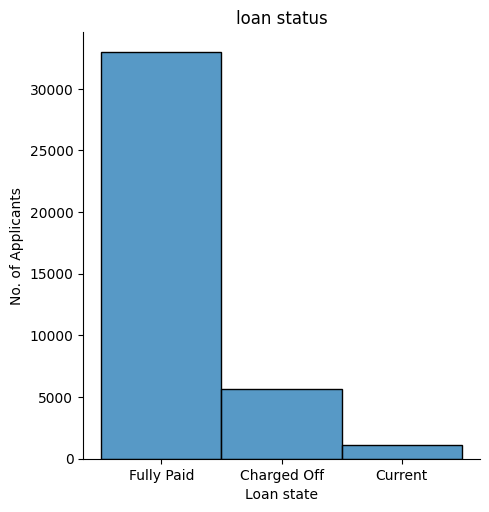

In [367]:
## Lets plot a distribution plot for it

plt.figure(figsize=(10,6))
sns.displot(loan_df['loan_status'])
plt.title('loan status')
plt.xlabel('Loan state')
plt.ylabel('No. of Applicants')
plt.show()


## Observation:
## Nearly more than 80% loans have been fully paid
## And around 14 % are charged Off

In [368]:
## Lets analyze the column loan_amnt. How much loan has been applied
## As it is a numeric field get gets some stats for this column

loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

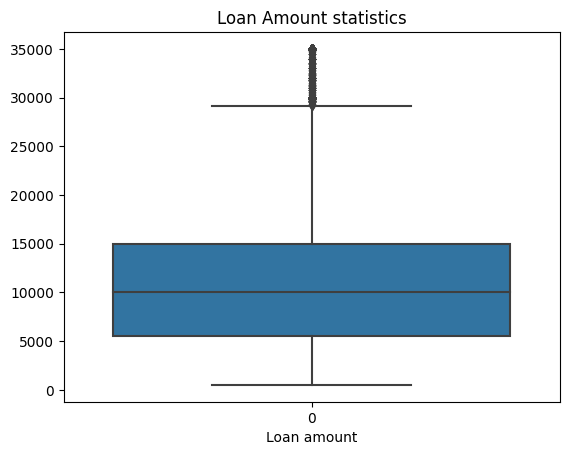

In [377]:
## Plotting a box plot for more understanding and visualize any outliers for it

sns.boxplot(loan_df['loan_amnt'])
plt.title('Loan Amount statistics')
plt.xlabel('Loan amount')
plt.show()

## Observations:
## Few of the records lie in the higher loan amount taken and are in the section of outliers

<Figure size 1000x1000 with 0 Axes>

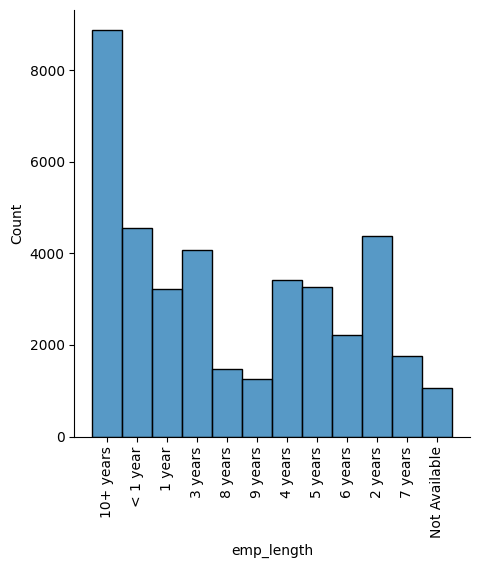

In [483]:
## Now lets get the statistics for the column emp_length
## Its a segmented data, lets view the distribution plot for it

plt.figure(figsize=(10,10))
sns.displot(loan_df['emp_length'])
plt.xticks(rotation=90)
plt.show()


## Observations:
## A high frequency of employees having more than 10+ years of experience avail the loan


In [385]:
## Analyze annual_inc

loan_df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot: >

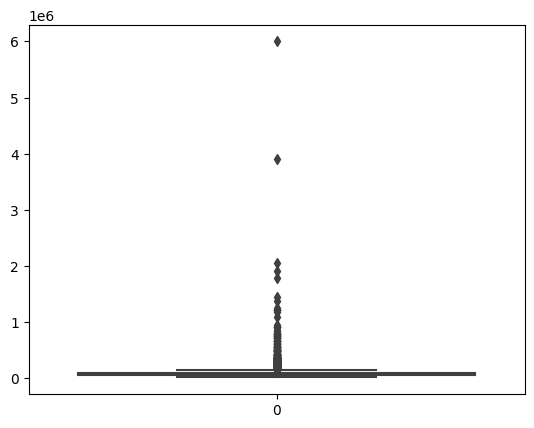

In [386]:
sns.boxplot(loan_df['annual_inc'])

(36699, 47)


<AxesSubplot: >

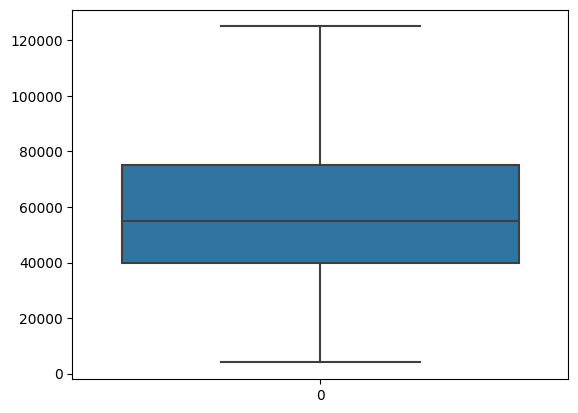

In [436]:
value  = np.percentile(loan_df['annual_inc'], 92.5)
loan_df_outlier = loan_df[loan_df['annual_inc'] <= value]

print(loan_df_outlier.shape)

sns.boxplot(loan_df_outlier['annual_inc'])

## Obserevations
## TODO

<AxesSubplot: >

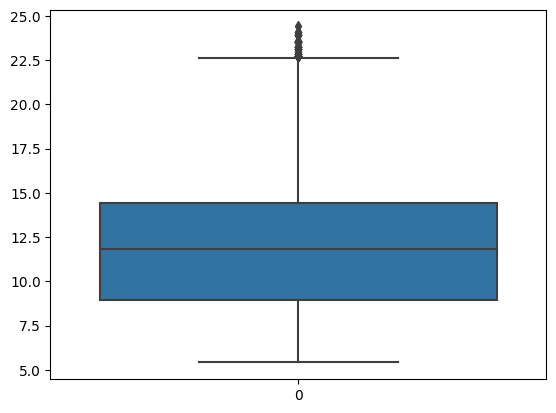

In [437]:
sns.boxplot(loan_df_outlier['int_rate'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24752\3202705218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df_outlier['int_rate'])


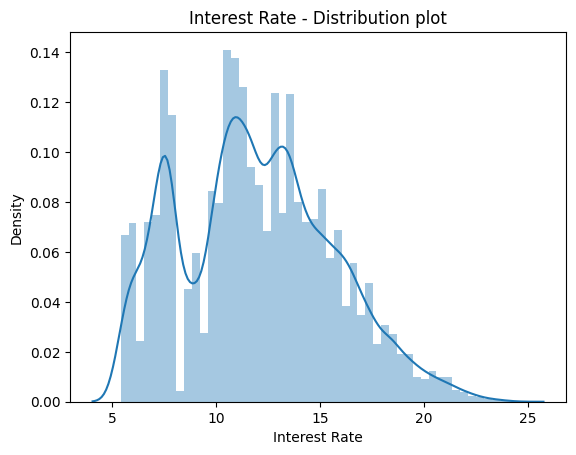

In [485]:
sns.distplot(loan_df_outlier['int_rate'])
plt.xlabel('Interest Rate')
plt.title('Interest Rate - Distribution plot')
plt.show()

In [ ]:
sns.distplot(loan_df_outlier['int_rate'])
plt.xlabel('Interest Rate')
plt.title('Interest Rate - Distribution plot')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24752\2469571250.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df_outlier['funded_amnt'])


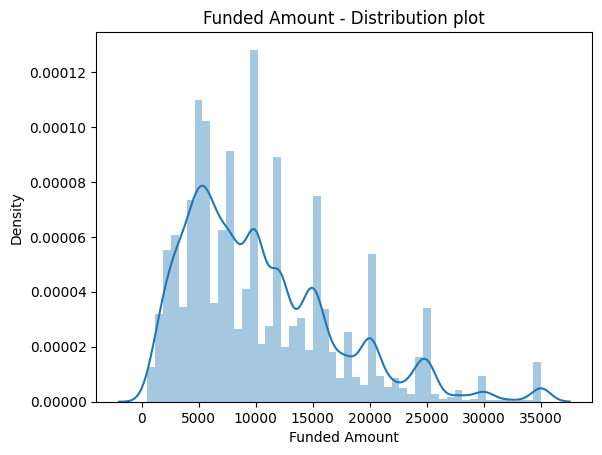

In [486]:
## funded_amnt

sns.distplot(loan_df_outlier['funded_amnt'])
plt.xlabel('Funded Amount')
plt.title('Funded Amount - Distribution plot')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24752\508363738.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df_outlier['funded_amnt_inv'])


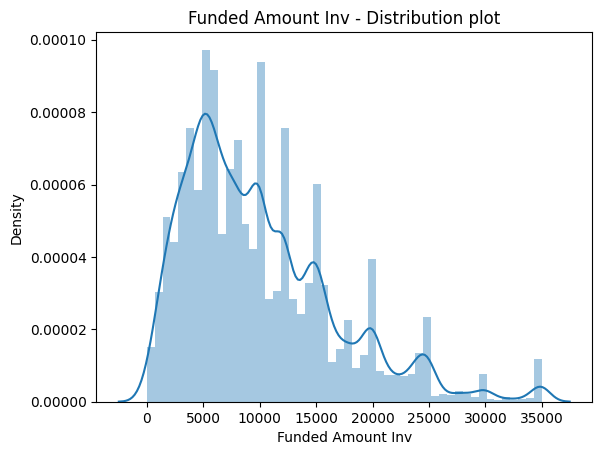

In [487]:
## funded_amnt_inv

sns.distplot(loan_df_outlier['funded_amnt_inv'])
plt.xlabel('Funded Amount Inv')
plt.title('Funded Amount Inv - Distribution plot')
plt.show()

<AxesSubplot: >

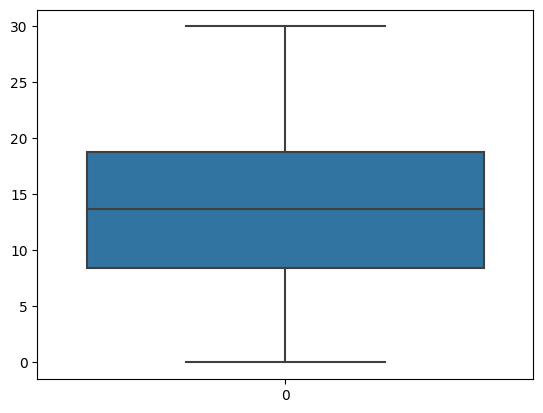

In [438]:
sns.boxplot(loan_df_outlier['dti'])

## BiVariate Analysis

In [439]:
loan_df_outlier.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,pub_rec_bankruptcies,month,year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0,0.0,12,2011
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0,0.0,12,2011


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'car'),
  Text(1, 0, 'small_business'),
  Text(2, 0, 'other'),
  Text(3, 0, 'debt_consolidation'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'credit_card'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'moving'),
  Text(8, 0, 'vacation'),
  Text(9, 0, 'house'),
  Text(10, 0, 'medical'),
  Text(11, 0, 'wedding'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

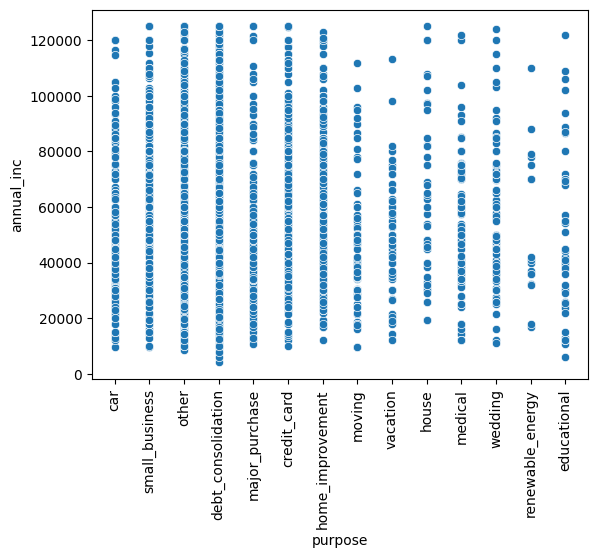

In [450]:
# loan_amount vs income

sns.scatterplot(data=loan_df_outlier[loan_df_outlier['loan_status'] == 'Charged Off'], x='purpose', y='annual_inc')
plt.xticks(rotation=90)
# sns.scatterplot(data=loan_df_outlier[loan_df_outlier['loan_status'] == 'Fully Paid'], x='loan_amnt', y='annual_inc')


<Figure size 1500x1000 with 0 Axes>

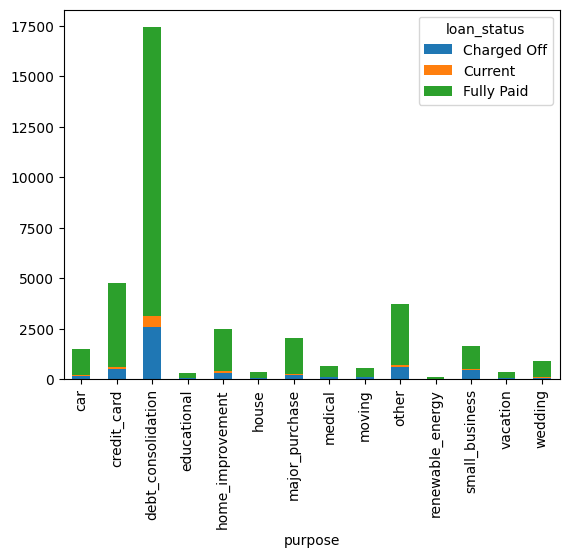

In [488]:
plt.figure(figsize=(15,10))

data1 = pd.pivot_table(data=loan_df_outlier, index='purpose', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar(stacked=True)
plt.show()

# (pd.pivot_table(data=loan_df_outlier, index='purpose', columns = 'loan_status', aggfunc='count'))['annual_inc'].plot.bar(stacked=True)

<AxesSubplot: xlabel='loan_status', ylabel='purpose'>

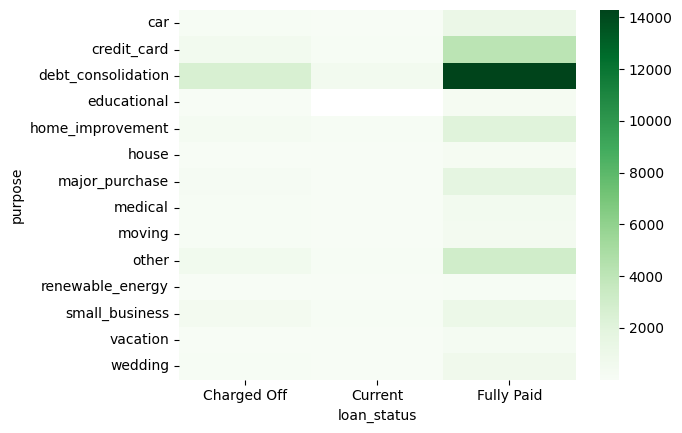

In [480]:
sns.heatmap(data = data1, cmap='Greens')

<Figure size 1500x1000 with 0 Axes>

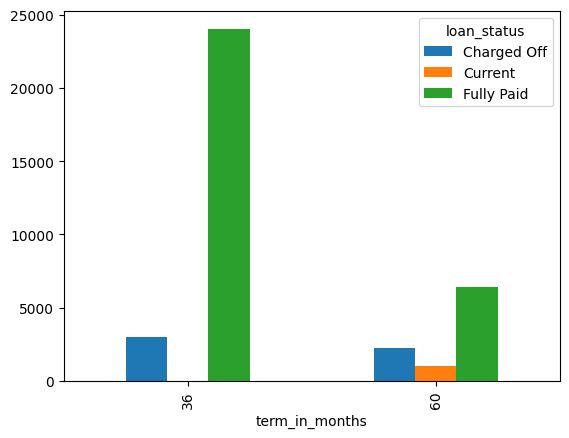

In [489]:
# term_in_months vs loan_status

plt.figure(figsize=(15,10))

data1 = pd.pivot_table(data=loan_df_outlier, index='term_in_months', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()
plt.show()

<Figure size 1500x1000 with 0 Axes>

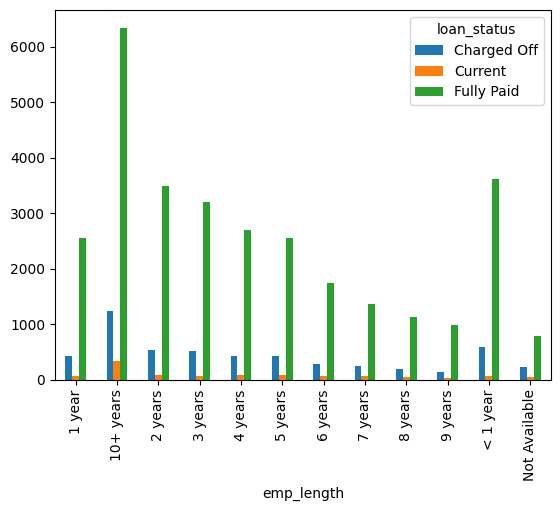

In [490]:
# emp_length vs loan_status

plt.figure(figsize=(15,10))

data1 = pd.pivot_table(data=loan_df_outlier, index='emp_length', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()
plt.show()

In [491]:
## lets analyze only caharged off data with various field values


loan_df_charged_off = loan_df_outlier[loan_df_outlier['loan_status'] == 'Charged Off']
loan_df_charged_off.shape

(5245, 47)

In [495]:
loan_df_charged_off.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,pub_rec_bankruptcies,month,year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0,0.0,12,2011
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,Apr-04,2,11,0,5210,32.6,13,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.09,Apr-12,152.39,Aug-12,INDIVIDUAL,0,0.0,12,2011


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24752\3473266811.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = loan_df_charged_off.corr()


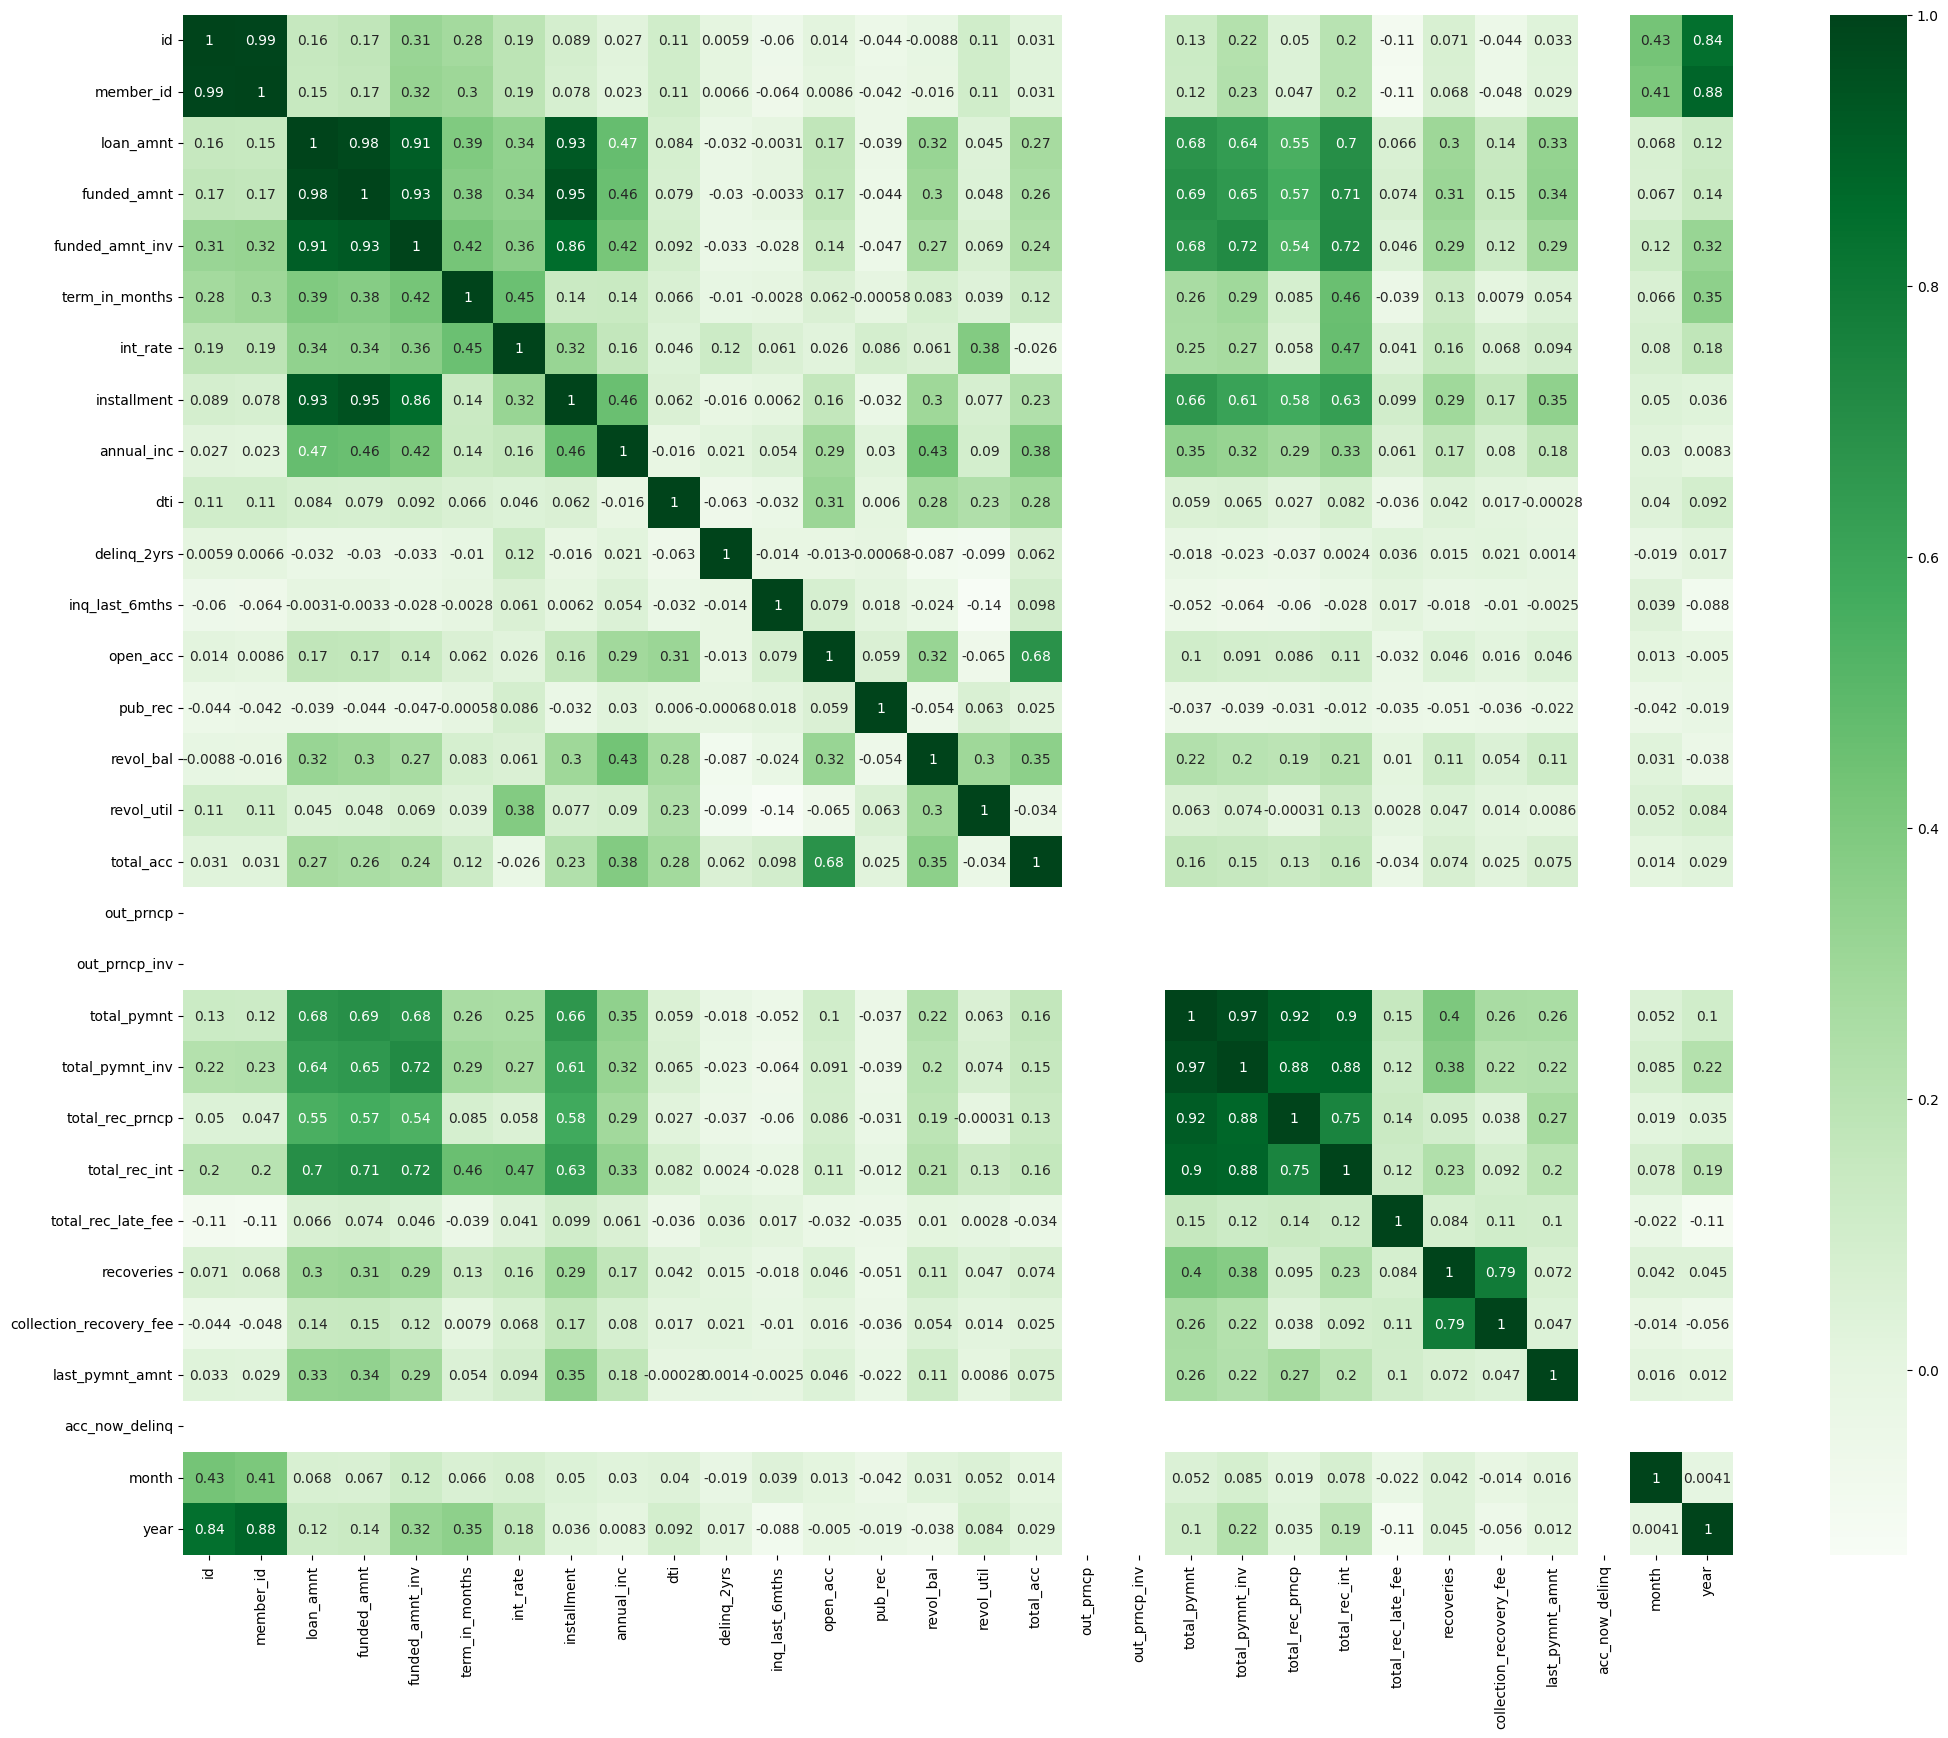

In [494]:
## lets view the corr

plt.figure(figsize=(25,20))
corr_data = loan_df_charged_off.corr()
sns.heatmap(data=corr_data, cmap="Greens", annot=True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24752\1493923049.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = dataset.corr()


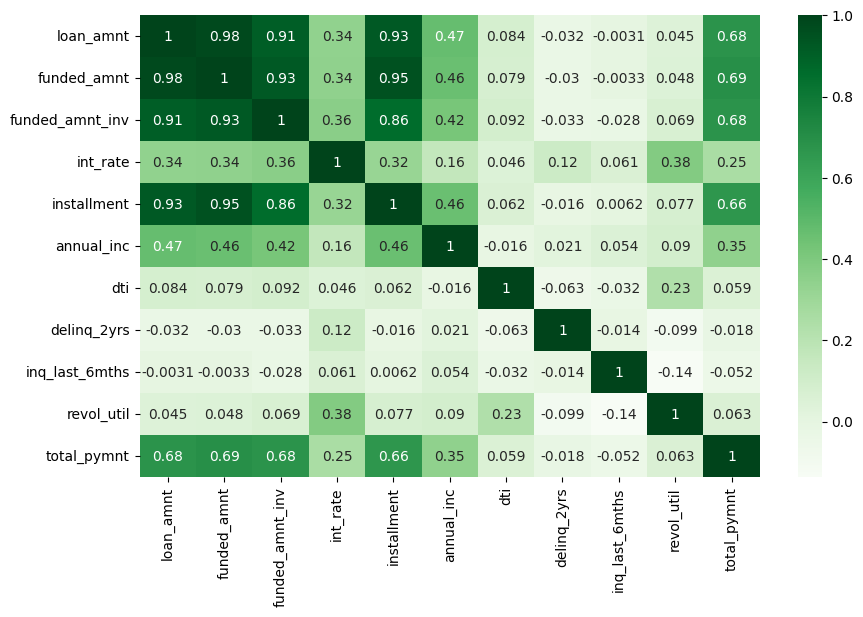

In [499]:
corr_list_of_fields = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths', 'revol_util', 'total_pymnt','pub_rec_bankruptcies']
dataset = loan_df_charged_off.loc[:,corr_list_of_fields]

plt.figure(figsize=(10,6))
corr_data = dataset.corr()
sns.heatmap(data=corr_data, cmap="Greens", annot=True)
plt.show()

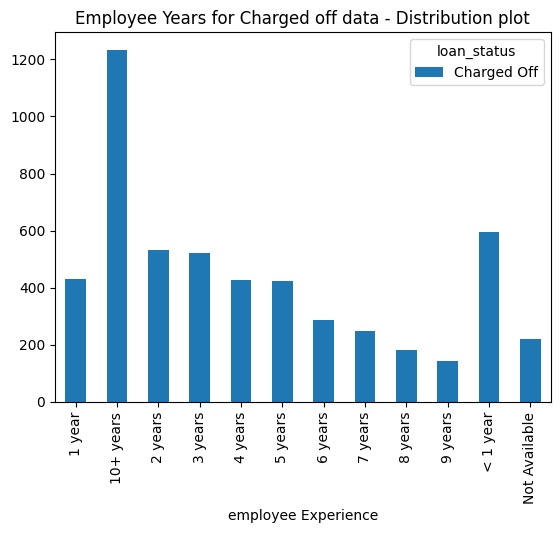

In [505]:
# emp_length dist plot

data1 = pd.pivot_table(data=loan_df_charged_off, index='emp_length', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar(stacked=True)

plt.xlabel('employee Experience')
plt.title('Employee Years for Charged off data - Distribution plot')
plt.show()

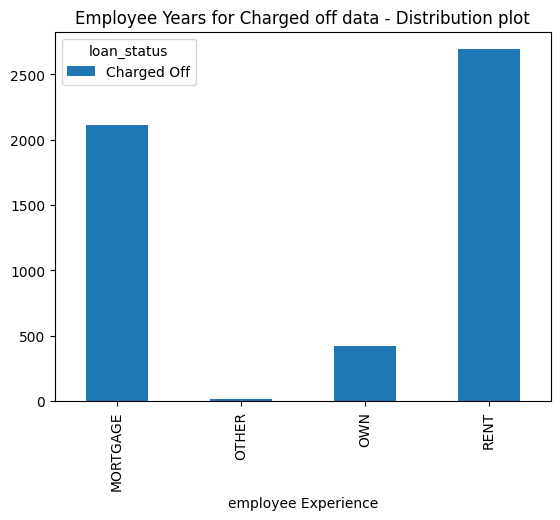

In [506]:
# home_ownership

data1 = pd.pivot_table(data=loan_df_charged_off, index='home_ownership', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()

plt.xlabel('Home Ownership')
plt.title('Home Ownership for Charged off data - bar plot')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24752\3078094716.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df_charged_off['year'])


<AxesSubplot: xlabel='year', ylabel='Density'>

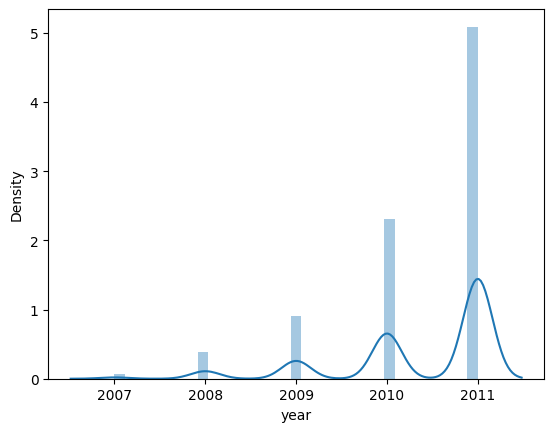

In [516]:
##

sns.distplot(loan_df_charged_off['year'])
